!pip install pandas
!pip install seaborn
!pip install matplot
!pip install -U scikit -learn
!pip install plotly==5.7.0

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\Python\advertising.csv")

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [22]:
print(data.describe())

print(data.dtypes)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


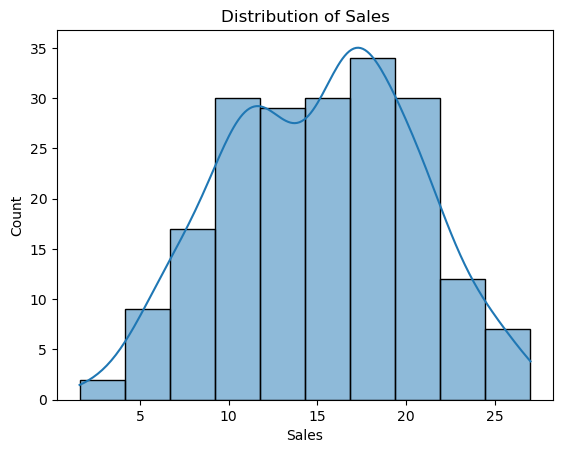

In [23]:
sns.histplot(data['Sales'],kde=True)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
plt.show()

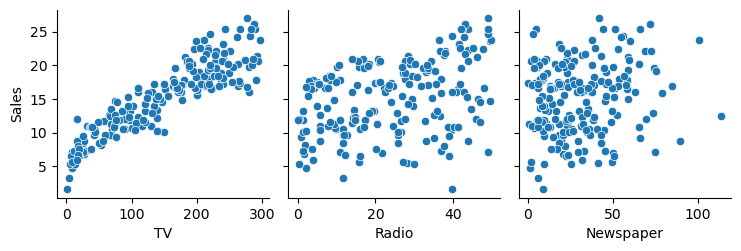

In [24]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

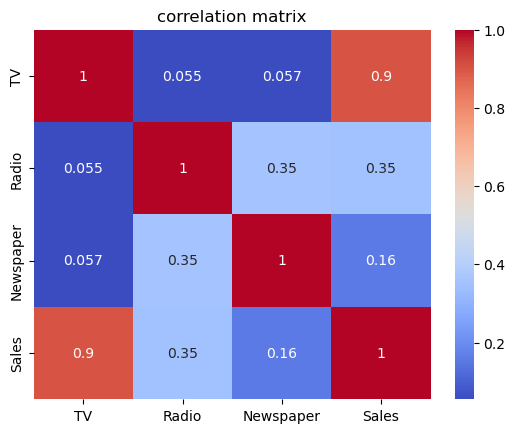

In [25]:
#calculate the correlation matrix
correlation = data[['TV','Radio','Newspaper','Sales']].corr()

#visualize the correlation matrix as a heatmap
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show()

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import plotly.express as px

In [27]:
#separate the features (TV,Radio,Newspaper) and the target variable (sales)
x=data[['TV','Radio','Newspaper']]
y=data['Sales']

#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Linear Regression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear = linear_model.predict(x_test)

#calculate metrics for linear Regression
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

#Print metrics
print("Linear Regression:")
print("Mean Squared Error:",linear_mse)
print("R-squared Score:",linear_r2)
print()


Linear Regression:
Mean Squared Error: 2.9077569102710923
R-squared Score: 0.9059011844150826



In [34]:
#Decision Tree Regression

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_pred_dt = dt_model.predict(x_test)

#calculate metriocs for decision tree regression
dt_mse= mean_squared_error(y_test,y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression:")
print("Mean Sqaured Error:",dt_mse)
print("R-squared Score:",dt_r2)
print()

Decision Tree Regression:
Mean Sqaured Error: 3.5797499999999998
R-squared Score: 0.8841546093828375



In [29]:
#Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)

#calculate metrics for random forest regression
rf_mse = mean_squared_error(y_test,y_pred_rf)
rf_r2 = r2_score(y_test,y_pred_rf)

print("Random Forest Regression:")
print("Mean Squared Error:",rf_mse)
print("R_squared Score:",rf_r2)

Random Forest Regression:
Mean Squared Error: 1.3959890500000014
R_squared Score: 0.9548239690496454


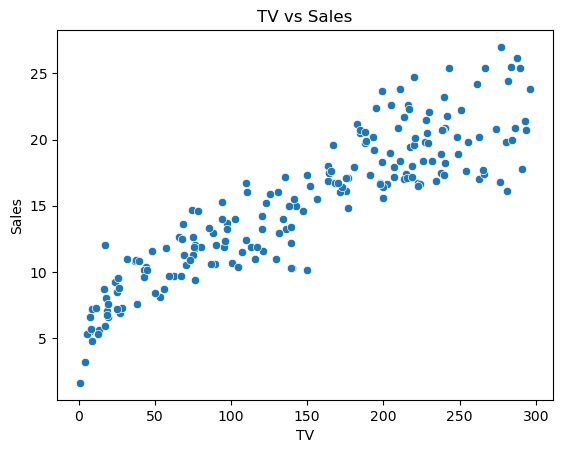

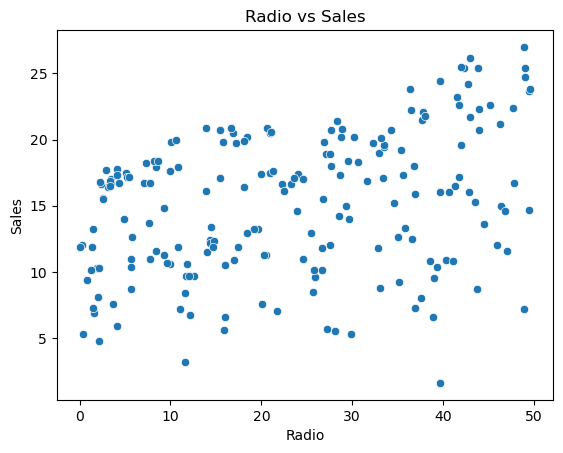

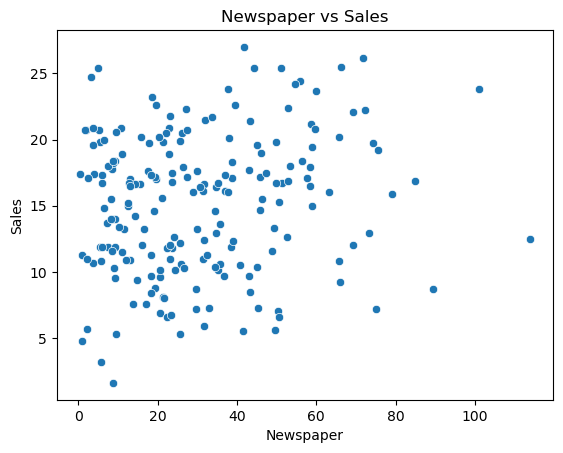

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#visualioze the relationship between TV and Sales
sns.scatterplot(data=data,x='TV',y='Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

#visualize the relationship between radio and sales
sns.scatterplot(data=data,x='Radio',y='Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')
plt.show()

#visualize the relationship betwwen newspaper and sales
sns.scatterplot(data=data,x='Newspaper',y='Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')
plt.show()

In [31]:
import pandas as pd
import plotly.express as px

#Visualize the relationship between TV and Sales using Plotly
fig_tv = px.scatter(data, x='TV',y='Sales',title='TV vs Sales')
fig_tv.update_layout(xaxis_title='TV',yaxis_title='Sales')
fig_tv.show()

#Visualize the relationship between Radio and Sales using Plotly
fig_radio = px.scatter(data,x='Radio',y='Sales', title='Radio vs Sales')
fig_tv.update_layout(xaxis_title='Radio', yaxis_title='Sales')
fig_radio.show()

#Visualize the relationship between newspaper and Sales using Plotly
fig_newspaper = px.scatter(data, x='Newspaper',y='Sales', title='Newspaper vs Sales')
fig_newspaper.update_layout(xaxis_title='Newspaper', yaxis_title='Sales')
fig_newspaper.show()

In [35]:
#3D Visualization using plotly
fig = px.scatter_3d(data, x='TV', y='Radio',z='Newspaper', color='Sales')
fig.update_layout(title="Sales Distribution")
fig.show()